# Part 1: Data Preprocessing

In [33]:
# Import usual suspects
import numpy as np
import pandas as pd

In [34]:
# Importing  the training set
pd_training_set = pd.read_csv('Lottery_NY_Lotto_Winning_Numbers__Beginning_2001_without_bonus.csv', header=None)
pd_training_set.head()

,0,1,2,3,4,5
0,8,13,26,35,45,51
1,1,15,24,31,34,44
2,3,8,29,30,31,49
3,21,25,39,50,54,59
4,15,19,32,38,47,50


In [35]:
# Training Set
# now add each column of six rows into next 6 rows of first column
two_dim_lotto_array_train = []
# take 300 rows less from total for testing and rest use for training
for col in pd_training_set.iloc[:-300,:].values:
#     print (col)
    for row in col:
        two_dim_lotto_array_train.append([row])
#         print (row)

In [36]:
# convert python list into numpy array
training_set_val = np.array(two_dim_lotto_array_train, ndmin=2)

print (type(training_set_val))
print (training_set_val.ndim)
print (training_set_val.shape)
print (training_set_val)

<class 'numpy.ndarray'>
2
(7968, 1)
[[ 8]
 [13]
 [26]
 ..., 
 [29]
 [46]
 [50]]


In [37]:
# Now, let's do normalization
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# # Accuracy: 0.0317802805365

from sklearn.preprocessing import MaxAbsScaler
sc = MaxAbsScaler()
#  Accuracy: 0.0293846626395



# from sklearn.preprocessing import RobustScaler
# sc = RobustScaler()
# # Accuracy: 0.0377802805365


training_set = sc.fit_transform(training_set_val)
print (training_set)
print (type(training_set))
print (training_set.ndim)
print (training_set.shape)

# ALSO TRY STANDARDIZATION INSTEAD OF NORMALIZATION

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()

# training_set = sc.fit_transform(training_set_val)
# print (training_set)
# print (type(training_set))
# print (training_set.ndim)
# print (training_set.shape)



[[ 0.13559322]
 [ 0.22033898]
 [ 0.44067797]
 ..., 
 [ 0.49152542]
 [ 0.77966102]
 [ 0.84745763]]
<class 'numpy.ndarray'>
2
(7968, 1)


In [39]:
# Creating a data structure with 60 timesteps and t+1 output
X_train = []
y_train = []
for i in range(60, 7968):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# # IMPORTANT Now we are setting X_train and y_train
# # X_train is time at 0 value and y_train is time at +1 value
# X_train = training_set[0:7967]
# print (X_train)

[[ 0.13559322]
 [ 0.22033898]
 [ 0.44067797]
 ..., 
 [ 0.3220339 ]
 [ 0.49152542]
 [ 0.77966102]]


In [7]:
# # y_train is time+1 value
# y_train = training_set[1:7968]
# print (y_train)

[[ 0.22033898]
 [ 0.44067797]
 [ 0.59322034]
 ..., 
 [ 0.49152542]
 [ 0.77966102]
 [ 0.84745763]]


In [40]:
# Now, Reshaping for keras before training, as it requires 3 dimenions

# changing from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
# X_train = np.reshape(X_train,(7967,1,1))

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print (X_train)

[[[ 0.13559322]
  [ 0.22033898]
  [ 0.44067797]
  ..., 
  [ 0.59322034]
  [ 0.69491525]
  [ 0.83050847]]

 [[ 0.22033898]
  [ 0.44067797]
  [ 0.59322034]
  ..., 
  [ 0.69491525]
  [ 0.83050847]
  [ 0.08474576]]

 [[ 0.44067797]
  [ 0.59322034]
  [ 0.76271186]
  ..., 
  [ 0.83050847]
  [ 0.08474576]
  [ 0.13559322]]

 ..., 
 [[ 0.79661017]
  [ 0.83050847]
  [ 0.96610169]
  ..., 
  [ 0.03389831]
  [ 0.20338983]
  [ 0.3220339 ]]

 [[ 0.83050847]
  [ 0.96610169]
  [ 0.15254237]
  ..., 
  [ 0.20338983]
  [ 0.3220339 ]
  [ 0.49152542]]

 [[ 0.96610169]
  [ 0.15254237]
  [ 0.16949153]
  ..., 
  [ 0.3220339 ]
  [ 0.49152542]
  [ 0.77966102]]]


# Part 2: Initializing the RNN

In [41]:
# importing the Keras liabraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [42]:
# Create a regressor bassed upon sequential RNN
# classifier = Sequential()
# classifier.add(LSTM(units=10, activation='sigmoid', input_shape=(None, 1)))
# classifier.add(Dense(units=1))
regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(None, 1), return_sequences = True))
regressor.add(LSTM(units=4, activation='sigmoid', return_sequences = True))
regressor.add(LSTM(units=4, activation='sigmoid', return_sequences = True))
regressor.add(LSTM(units=4, activation='sigmoid'))
regressor.add(Dense(units=1))

In [43]:
# Now, let' compile our RNN regressor
# classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy')
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train ,y_train, batch_size=32, epochs=50)

Epoch 1/50
7908/7908 [==============================] - 102s - loss: 0.0868   
Epoch 2/50
7908/7908 [==============================] - 104s - loss: 0.0829   
Epoch 3/50
7908/7908 [==============================] - 100s - loss: 0.0829   
Epoch 4/50
7908/7908 [==============================] - 98s - loss: 0.0829    
Epoch 5/50
6432/7908 [=======================>......] - ETA: 18s - loss: 0.0833

# Part 3: Making Prediction

In [13]:
# Testing Set
# now add each column of six rows into next 6 rows of first column
two_dim_lotto_array_test = []
# take all rows less from total for testing and rest use for training
for col in pd_training_set.iloc[:,:].values:
#     print (col)
    for row in col:
        two_dim_lotto_array_test.append([row])
#         print (row)

In [14]:
# convert python list into numpy array
testing_set_val = np.array(two_dim_lotto_array_test, ndmin=2)

print (type(testing_set_val))
print (testing_set_val.ndim)
print (testing_set_val.shape)
print (testing_set_val)

<class 'numpy.ndarray'>
2
(9768, 1)
[[ 8]
 [13]
 [26]
 ..., 
 [17]
 [26]
 [55]]


In [15]:
# NOw let's take only open price of stock
# if we choose pd_training_set.iloc[:,1] It will be only 1 dim pandas series
# however, we need 2 dimension, so
real_lotto_numbers = testing_set_val
print (type(real_lotto_numbers))
print (real_lotto_numbers.ndim)
print (real_lotto_numbers.shape)
# print (real_lotto_numbers)

<class 'numpy.ndarray'>
2
(9768, 1)


In [16]:
X_test = real_lotto_numbers[0:9767]
X_test = sc.fit_transform(X_test)
print (type(X_test))
print (X_test.ndim)
print (X_test.shape)
print (X_test)
# in the end inverse fit transform to get normal stock open price back
# X_test = real_lotto_numbers

<class 'numpy.ndarray'>
2
(9767, 1)
[[ 0.13559322]
 [ 0.22033898]
 [ 0.44067797]
 ..., 
 [ 0.20338983]
 [ 0.28813559]
 [ 0.44067797]]


In [17]:
# same for X_test
y_test = real_lotto_numbers[1:9768]
print (y_test)
print (type(y_test))
print (y_test.ndim)
print (y_test.shape)
print (y_test)

[[13]
 [26]
 [35]
 ..., 
 [17]
 [26]
 [55]]
<class 'numpy.ndarray'>
2
(9767, 1)
[[13]
 [26]
 [35]
 ..., 
 [17]
 [26]
 [55]]


In [18]:
# Reshaping

# chaging from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
test_inputs = np.reshape(X_test,(9767,1,1))
print (type(test_inputs))
print (test_inputs.ndim)
print (test_inputs.shape)
print (test_inputs)

<class 'numpy.ndarray'>
3
(9767, 1, 1)
[[[ 0.13559322]]

 [[ 0.22033898]]

 [[ 0.44067797]]

 ..., 
 [[ 0.20338983]]

 [[ 0.28813559]]

 [[ 0.44067797]]]


In [19]:
# Now, let's predict
y_predicted = regressor.predict(test_inputs)
print (type(y_predicted))
print (y_predicted.ndim)
print (y_predicted.shape)
print (y_predicted)

/Users/pankajmathur/anaconda/envs/keras-playground/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2094: UserWarning: Expected no kwargs, you passed 1
kwargs passed to function are ignored with Tensorflow backend
  warnings.warn('\n'.join(msg))


<class 'numpy.ndarray'>
2
(9767, 1)
[[ 0.37335977]
 [ 0.41680336]
 [ 0.50441271]
 ..., 
 [ 0.4085049 ]
 [ 0.44783846]
 [ 0.50441271]]


In [20]:
# inverse scaled values to get real stock price
predicted_lotto_numbers = np.around(sc.inverse_transform(y_predicted))
# predicted_lotto_numbers = sc.transform(y_predicted)
# predicted_lotto_numbers = y_predicted
print (type(predicted_lotto_numbers))
print (predicted_lotto_numbers.ndim)
print (predicted_lotto_numbers.shape)
print (predicted_lotto_numbers)
print (y_test)

<class 'numpy.ndarray'>
2
(9767, 1)
[[ 22.]
 [ 25.]
 [ 30.]
 ..., 
 [ 24.]
 [ 26.]
 [ 30.]]
[[13]
 [26]
 [35]
 ..., 
 [17]
 [26]
 [55]]


In [21]:
true_predictions = predicted_lotto_numbers == y_test
print ("Accuracy:", np.sum(true_predictions)/np.size(true_predictions))

Accuracy: 0.0247773113546


In [22]:
# Part 4: Let's Visualize the results

import matplotlib.pyplot as plt
%matplotlib inline

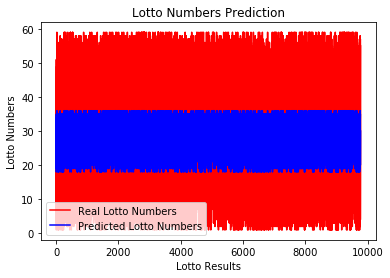

In [23]:
plt.plot(real_lotto_numbers, color='red', label = 'Real Lotto Numbers')
plt.plot(predicted_lotto_numbers, color='blue', label = 'Predicted Lotto Numbers')
plt.title('Lotto Numbers Prediction')
plt.xlabel('Lotto Results')
plt.ylabel('Lotto Numbers')
plt.legend()
plt.show()

In [24]:
X_sample = testing_set_val
X_sample = sc.fit_transform(X_sample)
print (type(X_sample))
print (X_sample.ndim)
print (X_sample.shape)
print (X_sample)
# in the end inverse fit transform to get normal stock open price back
# X_test = real_lotto_numbers

<class 'numpy.ndarray'>
2
(9768, 1)
[[ 0.13559322]
 [ 0.22033898]
 [ 0.44067797]
 ..., 
 [ 0.28813559]
 [ 0.44067797]
 [ 0.93220339]]


In [25]:
# Reshaping

# chaging from 2 to 3 dimension array, by addding time step as 3rd dimension
# corresponds to (batch_size, timesteps, input_dim)
sample_inputs = np.reshape(X_sample,(9768,1,1))
print (type(sample_inputs))
print (sample_inputs.ndim)
print (sample_inputs.shape)
print (sample_inputs)

<class 'numpy.ndarray'>
3
(9768, 1, 1)
[[[ 0.13559322]]

 [[ 0.22033898]]

 [[ 0.44067797]]

 ..., 
 [[ 0.28813559]]

 [[ 0.44067797]]

 [[ 0.93220339]]]


In [26]:
# Now, let's predict
y_sample = regressor.predict(sample_inputs)
print (type(y_sample))
print (y_sample.ndim)
print (y_sample.shape)
print (y_sample)

<class 'numpy.ndarray'>
2
(9768, 1)
[[ 0.37335977]
 [ 0.41680336]
 [ 0.50441271]
 ..., 
 [ 0.44783846]
 [ 0.50441271]
 [ 0.59640855]]


In [27]:
# inverse scaled values to get real stock price
sample_lotto_numbers = np.around(sc.inverse_transform(y_sample))
print (type(sample_lotto_numbers))
print (sample_lotto_numbers.ndim)
print (sample_lotto_numbers.shape)
print (sample_lotto_numbers)

<class 'numpy.ndarray'>
2
(9768, 1)
[[ 22.]
 [ 25.]
 [ 30.]
 ..., 
 [ 26.]
 [ 30.]
 [ 35.]]


In [28]:
# new_shape = real_lotto_numbers.reshape((11396))
# print (type(new_shape))
# print (new_shape.ndim)
# print (new_shape.shape)
# print (new_shape)
                           
real_lotto_numbers_df = pd.Series(real_lotto_numbers.reshape((9768)), name='real_lotto_numbers')
sample_lotto_numbers_df = pd.Series(sample_lotto_numbers.reshape((9768)), name='sample_lotto_numbers')
comparison_df = pd.concat([real_lotto_numbers_df, sample_lotto_numbers_df], axis=1)
comparison_df.tail(600)

,real_lotto_numbers,sample_lotto_numbers
9168,16,26.0
9169,18,27.0
9170,26,30.0
9171,44,34.0
9172,49,34.0
9173,51,35.0
9174,5,20.0
9175,12,24.0
9176,18,27.0
9177,33,32.0
